<a href="https://colab.research.google.com/github/Cosmo-ns/data-analysis-basic-kadai/blob/main/Keras_CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 像を判定するCNNの予測モデルを、Kerasを用いて構築します。CNNに10種類のさまざまな画像（飛行機や自動車、鳥など）をインプットすると、その画像がどのカテゴリの画像であるかの確率（「飛行機」である確率、「自動車」である確率、...）を出力することをゴールとします。CNN構築の流れは以下の通りです。

##################
# GPUへの切り替え#
##################

# 乱数の固定
# データの取得
# データの前処理
# CNN構造の検討
# CNN構造の定義
# 損失関数、最適化方法、評価指標の設定
# CNNの学習
# CNNの評価
# 未知データの予測

In [ ]:
from tensorflow.keras import utils
utils.set_random_seed(0)


In [ ]:
pip install tensorflow

In [ ]:
# データの取得
# 今回のCNN構築では、Kerasが提供しているCIFAR-10というサンプルデータを利用します。CIFAR-10は、飛行機や自動車、鳥などの10カテゴリに属するカラー画像のデータで、さまざまな画像処理システムの学習に使用されています。学習データには50,000枚の画像が、テストデータには10,000枚の画像が含まれ、画像サイズは縦32ピクセル×横32ピクセルです。

# データの取得
# それでは、データを取得していきましょう。TensorFlowをインポートし、CIFAR-10のデータを取得します
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
data


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(x_train, y_train), (x_test, y_test) = data


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))


0 255
0 9
0 255
0 9


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
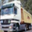

In [ ]:
x_train[1]


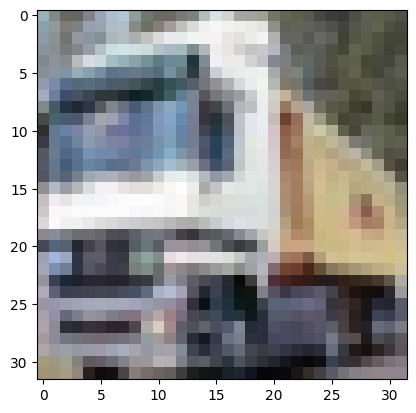

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])


In [ ]:
y_train[1]


array([9], dtype=uint8)

In [ ]:
# [9]はトラックを意味する数値ラベルです。想定通りトラックであることが確認できました。なお、CIFAR-10において、画像の各カテゴリを表現する数値ラベルは、以下の通りです。

# 数値ラベル	カテゴリ
# 0	飛行機
# 1	自動車
# 2	鳥
# 3	猫
# 4	鹿
# 5	犬
# 6	カエル
# 7	馬
# 8	船
# 9	トラック
# 以上で、データの取得と確認は完了です。

In [ ]:
# データの前処理
# 次に、CNNの学習や評価を実施できるように、データの前処理を行います。ここでは、画像データ（x_train, x_test）のスケーリングと、どのカテゴリに属する画像であるかを示す「0」から「9」の数値ラベル（y_train, y_test）のOne-hotベクトル化を実施します。

# スケーリング
# まずは、x_train, x_testのスケーリングを行います。画像データ（x_train, x_test）の各サンプルは、32×32×3の数値データで、各要素は、0から255の数値です。これらの数値を、0から1の範囲の値に変換します

x_train = x_train / 255
x_test = x_test / 255

# 以上で、スケーリングは完了です。

In [ ]:
# One-hotベクトル化
# 次に、y_train, y_testのOne-hotベクトル化を行います。今回のCNNで出力したいデータは、各カテゴリに属する確率（「飛行機」である確率、「自動車」である確率、...）、つまり10個の要素を持つ数値の配列です。

# y_train, y_testは、どのカテゴリであるかを示す0～9のデータです。これをOne-hotベクトル化することで、10個の要素を持つ数値配列に変換し、学習データとして利用できる形にします。utilsモジュールのto_categorical関数でOne-hotベクトル化が可能です。
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# 以上で、データの前処理は完了です。

In [ ]:
# CNN構造の検討
# 次は、CNNの構造を検討していきます。今回は、7章で解説した「CNN構造を検討する際のポイント」を参考に、以下のように決定します。

# CNN構造の検討
# 次は、CNNの構造を検討していきます。今回は、7章で解説した「CNN構造を検討する際のポイント」を参考に、以下のように決定します。

# 参考：7章 畳み込みニューラルネットワーク（CNN）とは > 7.5 CNN構造を検討する際のポイント

# 全体構成
# 一般的なCNNの構造を踏襲し、「畳み込み層を複数配置し、その後にプーリング層を配置する」というセットを連続させ、最後に全結合層を複数配置します。今回は、小規模なCNNを構築するため、畳み込み層→プーリング層→畳み込み層→プーリング層→全結合層→全結合層→全結合層という構成にします。

# 入力層
# インプットする画像データは、32×32ピクセルのカラー画像であるため、入力層は32×32×3とします。

# 畳み込み層
# 畳み込み層では、各層ごとに、深さ、活性化関数、直前の層に対するフィルタサイズ、ストライド、ゼロパディングの適用可否を決めます。これらを決めることによって、畳み込み層のノード構成の縦・横・深さのサイズも必然的に決まります。

# 畳み込み層の深さは、1つ目を64、2つ目を128とします。これは、VGGNetのモデルを参考にしたものです。活性化関数には、ReLU関数を利用します。フィルタサイズは3×3、ストライドは1、ゼロパディングを適用します。これらは、スタンフォード大学の講義CS231nで推奨されている設定値です。

# プーリング層
# プーリング層でも、CS231nで推奨されている設定値（フィルタサイズ2×2、ストライド2）とし、最大値を取得するMaxPoolingを利用します。

# 終盤の全結合層
# 出力層を構成するノード数は、予測結果として出力したいデータの要素数と一致させるため、10とします。活性化関数は、ソフトマックス関数を選択します。ソフトマックス関数は、各ノードの出力値の合計を1にする数学的特徴を持った、カテゴリ分類の予測モデルの出力層でよく活用される活性化関数です。

# 残り2つの全結合層のノード数については、LeNetの構造を参考に120、84とします。活性化関数は、隠れ層で一般的に活用されるReLU関数を適用します。

# 今回の検討結果はあくまでも1例で、決まった答えはありません。うまく機能している既存の予測モデルを参考に、試行錯誤しながら検討するものです。以上で、CNN構造の検討は完了です。

In [ ]:
# CNN構造の定義
# まずは、構造を定義するための主要クラスとして、Sequential, Flatten, Dense, Conv2D, MaxPooling2Dをインポートします。Conv2Dクラスは畳み込み層を、MaxPooling2Dはプーリング層を定義するためのクラスです。
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


In [ ]:
# 次に、Sequentialクラスをインスタンス化し、CNNを作成するための準備をします。
model = Sequential()


In [ ]:
# ニューラルネットワーク構造の定義と同じように、Sequentialクラスのaddメソッドを使って各層を追加していきます。まず、Conv2Dクラスを使って、入力層と、1つ目の畳み込み層を定義します。畳み込み層の深さ64、フィルタサイズ3×3、ストライド1、ゼロパディング適用、活性化関数ReLU、入力層のデータ構造32×32×3は、Conv2Dクラスの引数として指定可能です。

# Conv2Dクラスでは、第1引数に畳み込み層の深さ、第2引数にフィルタサイズを指定します。ストライドはデフォルトで1なので、今回は特に指定しません。パディングを適用する場合、paddingパラメータにsameを設定します。活性化関数は、activationパラメータで設定可能です。入力層のデータ構造は、input_shapeパラメータを用いて指定できます。

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))


In [ ]:
# 続いて、MaxPooling2Dクラスを使って、1つ目のプーリング層を追加しましょう。MaxPooling2Dクラスの引数で、フィルタサイズ2×2とストライド2を指定できます。フィルタサイズはpool_sizeパラメータを用いて指定します。ストライドはデフォルトでフィルタサイズと同じ大きさになる（今回はデフォルトで2）ため、特に指定は不要です。
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
# 同様の手順で、2つ目の畳み込み層と、2つ目のプーリング層を追加します。
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
# 続いて、3つの全結合層を追加しましょう。まず、直前のプーリング層から全結合層へデータが移る際に、3次元構造を1次元構造に変換しなければなりません。この際、Flattenクラスを使用します。その後、Denseクラスを使って、各層のノード数と活性化関数を設定します。
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
# これで、CNN構造の定義が完了しました。定義したCNNが、検討内容どおりに完成しているかを可視化して確認しましょう。
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [ ]:
# 上図に示されているように、畳み込み層以降の層が順番に表示されています。また、「Output Shape」列では各層から次の層へ伝わるデータの形状が表示されており、「Param」列では各層が保持するパラメータ数（重みと閾値の数）が表示されています。

# Flattenと表示されている層は、プーリング層から出力される3次元構造のデータを1次元構造に変換したデータを指しており、プーリング層でも全結合層でもありません。これで、CNN構造の定義は完了です。

In [ ]:
# 損失関数、最適化方法、評価指標の設定
# 次に、学習プロセスにおける損失関数、最適化方法、評価指標の設定に移ります。

# 損失関数
# カテゴリ分類に適した損失関数であるカテゴリ交差エントロピー誤差を使用します。

# 最適化方法
# メジャーな最適化手法の1つで、他の最適化手法よりも収束が速い傾向があることが示されているAdamを使用します。

# 評価指標
# どのカテゴリに属するかという分類問題において有効な指標である正解率を、評価指標として追加します。

# それでは、Sequentialクラスのcompileメソッドを使って、損失関数にカテゴリ交差エントロピー誤差を、最適化方法にAdamを、評価指標に正解率を設定しましょう。

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy')


In [ ]:
# 以上で、損失関数、最適化方法、評価指標の設定は完了です。

In [ ]:
# CNNの学習
# 学習のステップでは、まず学習プロセスにおけるハイパーパラメータを検討し、その後に学習を実施します。順に解説していきます。

# ハイパーパラメータの検討
# まず、エポック数、バッチサイズ、学習率といったハイパーパラメータを検討します。

# バッチサイズ
# 今回は、バッチサイズを128に設定します。多くの場合、バッチサイズに2のべき乗（2, 4, 8, 16, 32, 64など）を指定しますが、これは慣習であり、他の数値でも構いません。最適なバッチサイズは、学習率とのバランスで決まるとされています。学習がうまくいかない場合は、試行錯誤を繰り返しながら調整する必要があります。

# エポック数
# エポック数は、暫定的に10に設定します。エポック数を増やしすぎると、過学習のリスクが高まり、エポック数が少なすぎると、学習不足になる可能性があります。適切なエポック数を見つけるためには、学習履歴（エポックごとの損失関数や正解率の推移）を見ながら調整することが重要です。

# 学習率
# Kerasでは、Adamの学習率の初期値がデフォルトで0.001に設定されており、今回はその値を使用します。学習率をカスタマイズする場合は、compileメソッドで最適化手法を指定するタイミングで行います。

# 学習
# 学習を開始しましょう。今回は、学習データの1割をバリデーションデータとして利用します。学習は、Sequentialクラスのfit関数で実行できます。

# 引数には、学習データであるx_train, y_trainを指定し、batch_sizeパラメータにバッチサイズ数「128」を、epochsパラメータにエポック数「10」を、validation_splitに学習データからバリデーションデータとして切り分けるデータの割合「0.1」を指定します。

# fit関数の出力には学習履歴の情報が含まれています。後続プロセスで利用できるように、出力値をhistoryという変数に代入します。

history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)


Epoch 1/10
352/352 [==============================] - 10s 12ms/step - loss: 1.5120 - accuracy: 0.4530 - val_loss: 1.2357 - val_accuracy: 0.5712
Epoch 2/10
352/352 [==============================] - 4s 10ms/step - loss: 1.1039 - accuracy: 0.6100 - val_loss: 1.0007 - val_accuracy: 0.6576
Epoch 3/10
352/352 [==============================] - 4s 11ms/step - loss: 0.9401 - accuracy: 0.6700 - val_loss: 0.9103 - val_accuracy: 0.6928
Epoch 4/10
352/352 [==============================] - 3s 10ms/step - loss: 0.8303 - accuracy: 0.7089 - val_loss: 0.8811 - val_accuracy: 0.6924
Epoch 5/10
352/352 [==============================] - 4s 10ms/step - loss: 0.7541 - accuracy: 0.7346 - val_loss: 0.8509 - val_accuracy: 0.7076
Epoch 6/10
352/352 [==============================] - 4s 11ms/step - loss: 0.6789 - accuracy: 0.7633 - val_loss: 0.8043 - val_accuracy: 0.7314
Epoch 7/10
352/352 [==============================] - 4s 10ms/step - loss: 0.5998 - accuracy: 0.7900 - val_loss: 0.8060 - val_accuracy: 0.733

In [ ]:
# 学習履歴の可視化
# fit関数の戻り値であるHistoryオブジェクトのhistory属性に保存された学習履歴の推移を、PandasのDataFrameに変換します。

import pandas as pd
df = pd.DataFrame(history.history)


<Axes: >

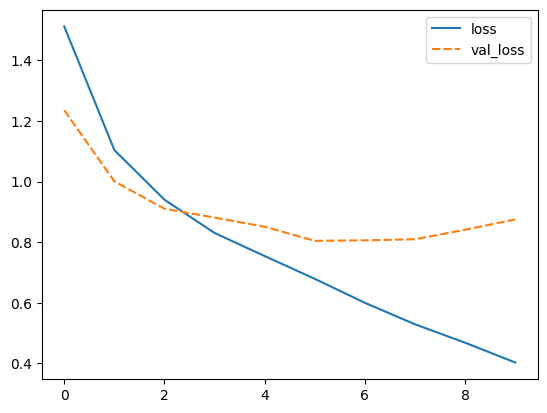

In [ ]:
# 次に、seabornのlineplotメソッドを利用して、損失関数（loss, val_loss）の推移を可視化します。

import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])


In [ ]:
# ※横軸がエポック数（0が1エポック目、1が2エポック目、...）、縦軸が損失関数の計算結果を表示。


<Axes: >

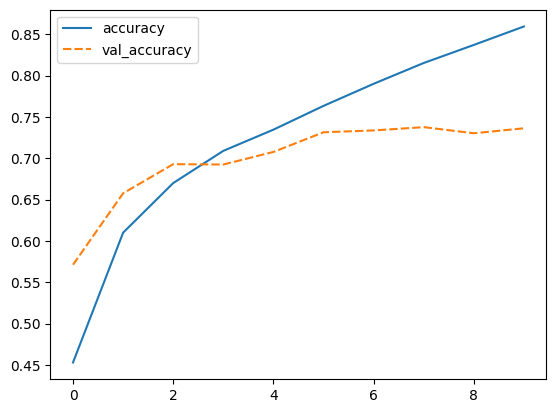

In [ ]:
# 同様に、正解率（accuracy, val_accuracy）の推移も可視化します。

sns.lineplot(data=df[['accuracy', 'val_accuracy']])


In [ ]:
# ※横軸がエポック数、縦軸が正解率を表示。
# ※GPUを使用している場合、正解率が表示のものと僅かに異なります。

# 損失関数と正解率の推移の両方で、5エポック目あたりから、バリデーションデータの改善がほとんど進まず、学習データの推移と乖離が始まっていることが分かります。そのため過学習を抑えつつ、損失関数をできるだけ減らし、正解率を向上させるために、エポック数5で再び学習をします。

In [ ]:
# 学習（エポック数調整後）
# エポック数を5に設定して再度学習を実施します。学習を最初からやり直すには、CNN構造の定義以降のプログラムを再実行する必要があります。初回学習時の1〜5エポック目の結果に対する再現性を高めるために、乱数の固定処理も再実行しましょう。

# 乱数の固定
utils.set_random_seed(0)

# モデル定義
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 誤差関数、最適化手法、評価関数の設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy')

# 学習
model.fit(x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1)


Epoch 1/5
352/352 [==============================] - 5s 11ms/step - loss: 1.5136 - accuracy: 0.4519 - val_loss: 1.2086 - val_accuracy: 0.5720
Epoch 2/5
352/352 [==============================] - 3s 10ms/step - loss: 1.0971 - accuracy: 0.6118 - val_loss: 0.9976 - val_accuracy: 0.6512
Epoch 3/5
352/352 [==============================] - 3s 10ms/step - loss: 0.9376 - accuracy: 0.6681 - val_loss: 0.8931 - val_accuracy: 0.6990
Epoch 4/5
352/352 [==============================] - 3s 9ms/step - loss: 0.8317 - accuracy: 0.7092 - val_loss: 0.8692 - val_accuracy: 0.7070
Epoch 5/5
352/352 [==============================] - 4s 10ms/step - loss: 0.7527 - accuracy: 0.7362 - val_loss: 0.8394 - val_accuracy: 0.7158


In [ ]:
# 以上で、CNNの学習は完了です。

In [ ]:
# CNNの評価
# 次に、学習済みCNNの評価をしましょう。Sequentialクラスのevaluateメソッドを使って評価を実行できます。

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.8579 - accuracy: 0.7014


[0.8578988313674927, 0.7013999819755554]

In [ ]:
# ※GPUを使用している場合、損失関数や正解率の数値が表示のものと僅かに異なります。
# テストデータによる評価結果は、損失関数（loss）が約0.8536であり、正解率（accuracy）は約0.7039です。この評価結果が十分であれば、次のステップに進みます。そうでなければ、CNNの構造や損失関数、最適化手法、ハイパーパラメータなどを見直して、再度学習をする必要があります。

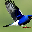

In [ ]:
# 未知データの予測
# それでは、完成したCNNを用いて、未知のデータの予測をしましょう。

# 画像ファイルの取り込み
# まずは、予測したい画像を取り込みます。「unknown_cifar.jpg」（リンクからダウンロード可）を未知の画像データとして利用してください。ダウンロード後、Google Colaboratoryに「unknown_cifar.jpg」をアップロードします。

# Google Colaboratoryの画面左のファイルタブをクリックし、「unknown_cifar.jpg」をドラッグアンドドロップしてください。「unknown_cifar.jpg」というファイル名が表示されたら、アップロード完了です。


# 次に、Kerasのpreprocessingモジュールのload_img関数をインポートし、画像を取り込みます。target_sizeパラメータで、取り込み時の画像のサイズを指定できます。CNNにインプットするための前処理に手間がかからないよう、学習データと同じサイズである、縦32ピクセル×横32ピクセルを指定しましょう。

from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('/content/unknown_cifar.jpg', target_size=(32, 32))
unknown_img


In [ ]:
# この画像データを、preprocessingモジュールのimg_to_array関数で、array形式に変換します。

from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)


In [ ]:
# 次にスケーリングを行います。
unknown_array = unknown_array/255


In [ ]:
# 次に、arrayのデータ構造を確認しましょう。
unknown_array.shape


(32, 32, 3)

In [ ]:
# 縦32ピクセル×横32ピクセル×3チャネル」の3次元データになっています。一方で、CNNにインプット可能なx_trainやx_testのデータ構造が、どのようになっているかを確認しましょう。
print(x_train.shape, x_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# CNNにインプット可能なデータ構造は、「任意のサンプル数×縦32ピクセル×横32ピクセル×3チャネル」となっています。したがって、unknown_arrayのデータの構造を、Numpyのreshape関数を用いて変換します。
unknown_array = unknown_array.reshape((1, 32, 32, 3))
unknown_array.shape


(1, 32, 32, 3)

In [ ]:
# unknown_arrayを、x_trainやx_testと同じデータ構造に変換できました。

In [ ]:
# 予測
# 最後に、Sequentialクラスのpredictメソッドを利用して、取り込んだ画像データがどのカテゴリの画像であるかの予測をします。

result = model.predict(unknown_array)
result


1/1 [==============================] - 0s 296ms/step


array([[2.1326616e-03, 2.1886727e-02, 4.9259761e-01, 5.9493698e-02,
        3.8592315e-03, 3.7568951e-01, 1.1274718e-03, 4.2799942e-02,
        2.4578407e-05, 3.8854551e-04]], dtype=float32)

<Axes: >

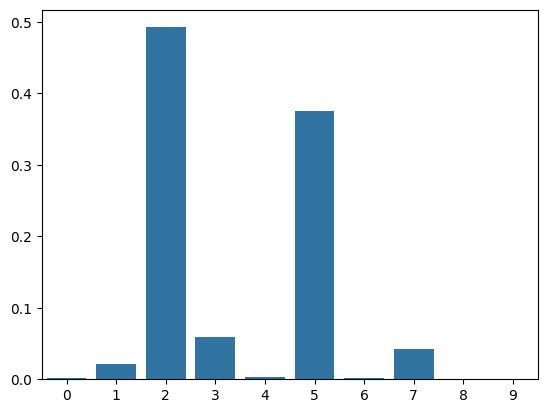

In [ ]:
# 出力された10個の数値はそれぞれ、「飛行機」「自動車」「鳥」...である確率を示しています。seabornのbarplot関数を利用して、各カテゴリの確率を棒グラフで可視化してみましょう。
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=result[0])


In [ ]:
# この結果から、取り込んだ未知のデータの画像は、ラベル2が意味する「鳥」であると判断できます。なお、各数値ラベルが意味するカテゴリは以下の通りです。

# 数値ラベル	カテゴリ
# 0	飛行機
# 1	自動車
# 2	鳥
# 3	猫
# 4	鹿
# 5	犬
# 6	カエル
# 7	馬
# 8	船
# 9	トラック
# 画像を判定するCNN構築の流れは、以上となります。